In [1]:
# Evolution des genres dans le temps
import pandas as pd
import numpy as np

In [2]:
# Load movies data
metadata_column = [
    'Wikipedia_movie_ID', 
    'Freebase_movie_ID', 
    'Movie_name', 
    'Movie_release_date', 
    'Movie_box_office_revenue', 
    'Movie_runtime', 
    'Movie_languages', 
    'Movie_countries', 
    'Movie_genres'
]

data_folder = '../data/MovieSummaries'
df = pd.read_csv(data_folder + '/movie.metadata.tsv', sep='\t', decimal=',', names=metadata_column)
print(df.head(1)['Movie_genres'])

0    {"/m/01jfsb": "Thriller", "/m/06n90": "Science...
Name: Movie_genres, dtype: object


In [3]:
# Only keep year in movie release data
def extract_year(date):
    # Check if the date is NaN
    if pd.isna(date):
        return None
    # If it's only the year (e.g., "1988"), return it as an integer
    elif len(str(date)) == 4:
        return int(date)
    else:
        # Otherwise, try to parse it as a date and get the year
        try:
            return int(pd.to_datetime(date).year)
        except:
            return None

# Apply the function to extract the year
df_year = df['Movie_release_date'].apply(extract_year)
df_year

0        2001.0
1        2000.0
2        1988.0
3        1987.0
4        1983.0
          ...  
81736    2011.0
81737    2011.0
81738    1972.0
81739    1992.0
81740    2002.0
Name: Movie_release_date, Length: 81741, dtype: float64

In [4]:
# Format movie languages, countries and genres
def remove_id(original_str):
    if pd.isna(original_str) or original_str == '{}':
        return [] # if NaN, return empty list
    
    original_elems = original_str.strip('{}').split(',')
    new_elems = [elem.split(':', 1)[1].strip().strip('"') for elem in original_elems if ':' in elem]
    return new_elems

df['Movie_genres'] = df['Movie_genres'].apply(remove_id)
print(df['Movie_genres'])

0        [Thriller, Science Fiction, Horror, Adventure,...
1         [Mystery, Biographical film, Drama, Crime Drama]
2                                   [Crime Fiction, Drama]
3        [Thriller, Erotic thriller, Psychological thri...
4                                                  [Drama]
                               ...                        
81736                                              [Drama]
81737              [Biographical film, Drama, Documentary]
81738                                     [Satire, Comedy]
81739    [Science Fiction, Japanese Movies, Adventure, ...
81740                    [Thriller, Horror, Slasher, Teen]
Name: Movie_genres, Length: 81741, dtype: object


In [5]:
# Step 1: Handle NaNs
df['Movie_release_date'] = df['Movie_release_date'].fillna('Unknown')
df['Movie_genres'] = df['Movie_genres'].fillna('{}')

# Step 2: Extract Year from `Movie_release_date`
def extract_year(date):
    # Check if the date is NaN or 'Unknown'
    if date == 'Unknown' or pd.isna(date):
        return None
    # If it's only the year (e.g., "1988"), return it as an integer
    elif len(str(date)) == 4:
        return int(date)
    else:
        # Otherwise, try to parse it as a date and get the year
        try:
            return int(pd.to_datetime(date).year)
        except:
            return None

# Apply the function to extract the year
df['year'] = df['Movie_release_date'].apply(extract_year)
print(df['year'])

0        2001.0
1        2000.0
2        1988.0
3        1987.0
4        1983.0
          ...  
81736    2011.0
81737    2011.0
81738    1972.0
81739    1992.0
81740    2002.0
Name: year, Length: 81741, dtype: float64


In [6]:
# By year the top genres
# Expand each genre in the 'Movie_genres' list so each genre has its own row
df_expanded = df.explode('Movie_genres')

# Group by 'year' and 'Movie_genres' and count occurrences
genre_distribution = df_expanded.groupby(['year', 'Movie_genres']).size().unstack(fill_value=0)

# Display the genre distribution table
print(genre_distribution)

Movie_genres  Absurdism  Acid western  Action  Action Comedy  \
year                                                           
1888.0                0             0       0              0   
1889.0                0             0       0              0   
1890.0                0             0       0              0   
1891.0                0             0       0              0   
1892.0                0             0       0              0   
...                 ...           ...     ...            ...   
2012.0                0             0     187              0   
2013.0                0             0      44              0   
2014.0                0             0       1              0   
2015.0                0             0       2              0   
2016.0                0             0       1              0   

Movie_genres  Action Thrillers  Action/Adventure  Addiction Drama  Adult  \
year                                                                       
1888.0         

/var/folders/1r/264rcd_x1xbgxkk4w75bt6pw0000gn/T/ipykernel_14670/441481081.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


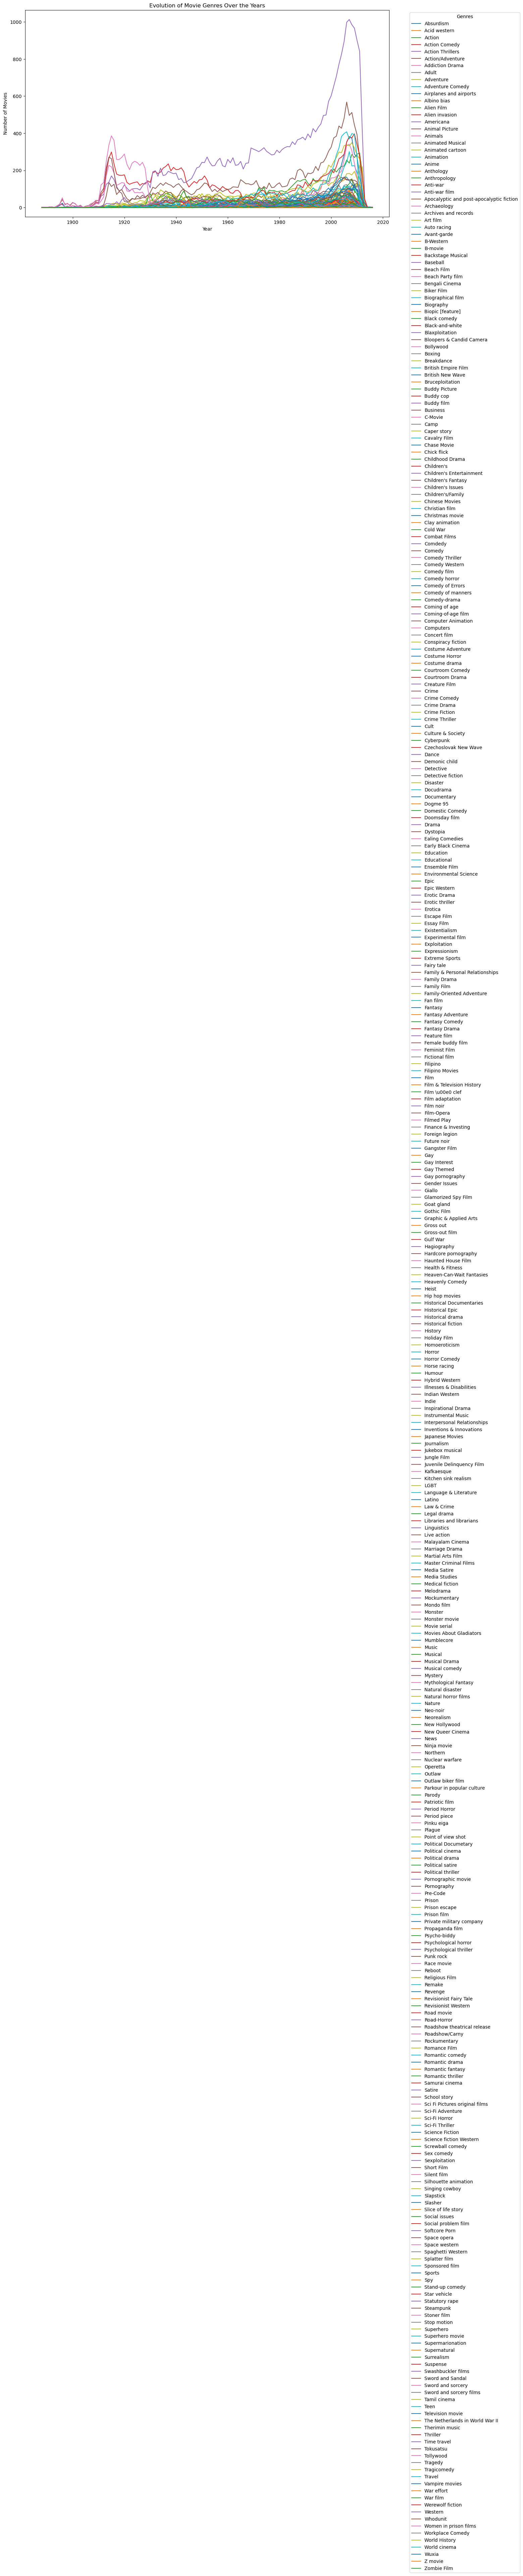

In [7]:
# I want the evolution of genre throughout the year
import matplotlib.pyplot as plt
# Plot the evolution of genres over the years
plt.figure(figsize=(14, 8))
for genre in genre_distribution.columns:
    plt.plot(genre_distribution.index, genre_distribution[genre], label=genre)

plt.title('Evolution of Movie Genres Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/var/folders/1r/264rcd_x1xbgxkk4w75bt6pw0000gn/T/ipykernel_14670/344319852.py:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


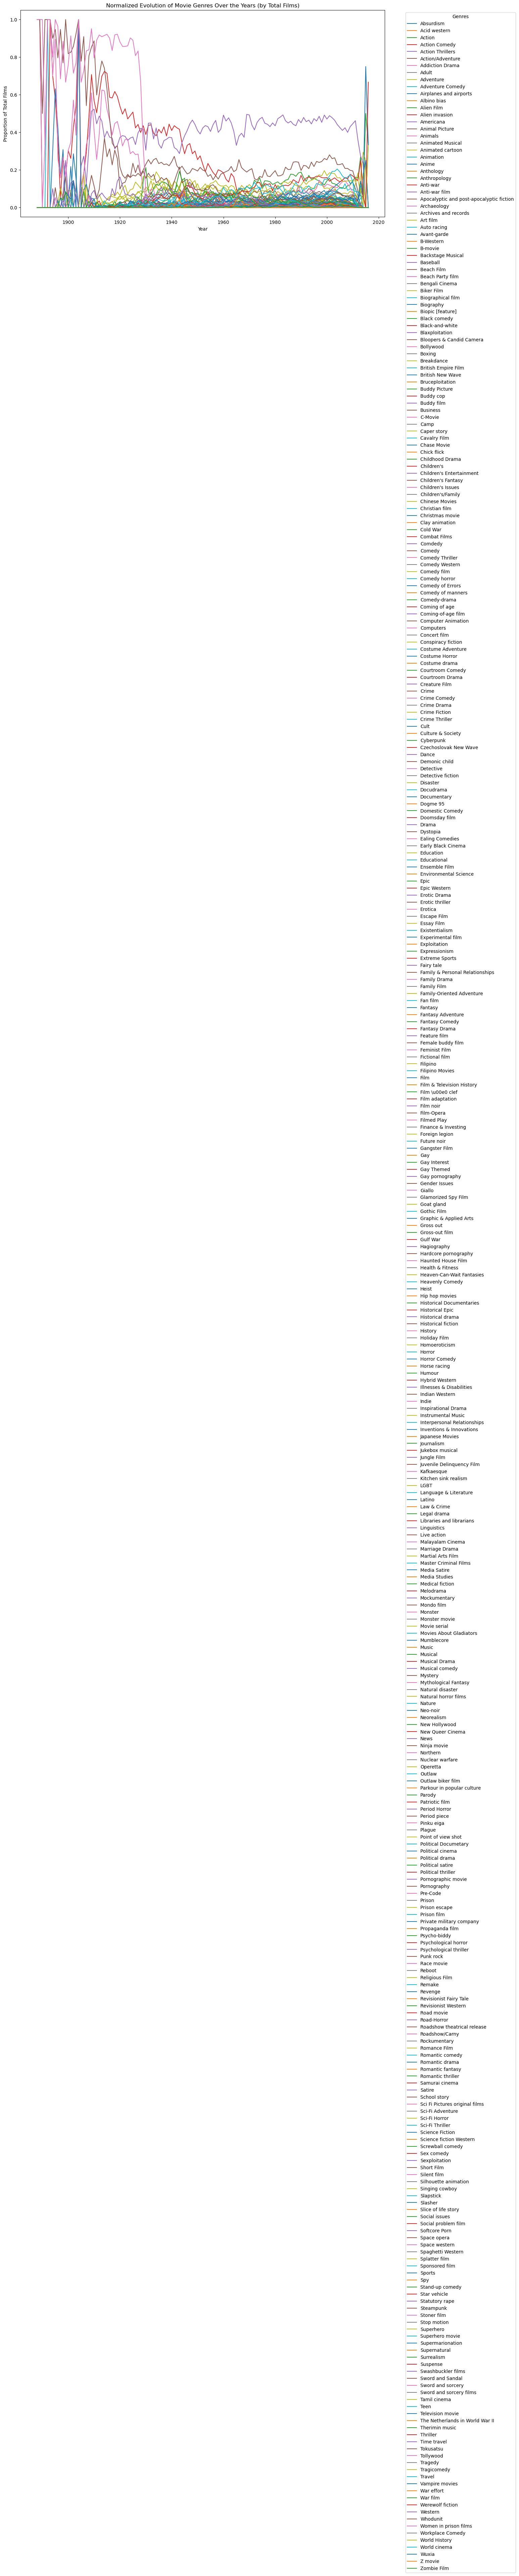

In [8]:
# Normalize genres per year
# Expand the genres so each genre has its own row
df_expanded = df.explode('Movie_genres')

# Group by 'year' and 'Movie_genres' to get the count of each genre per year
genre_distribution = df_expanded.groupby(['year', 'Movie_genres']).size().unstack(fill_value=0)

# Calculate the total number of films per year
total_films_per_year = df.groupby('year').size()

# Normalize by dividing each genre count by the total number of films that year
genre_distribution_normalized = genre_distribution.div(total_films_per_year, axis=0)

# Plot the normalized evolution of genres over the years
plt.figure(figsize=(14, 8))
for genre in genre_distribution_normalized.columns:
    plt.plot(genre_distribution_normalized.index, genre_distribution_normalized[genre], label=genre)

plt.title('Normalized Evolution of Movie Genres Over the Years (by Total Films)')
plt.xlabel('Year')
plt.ylabel('Proportion of Total Films')
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

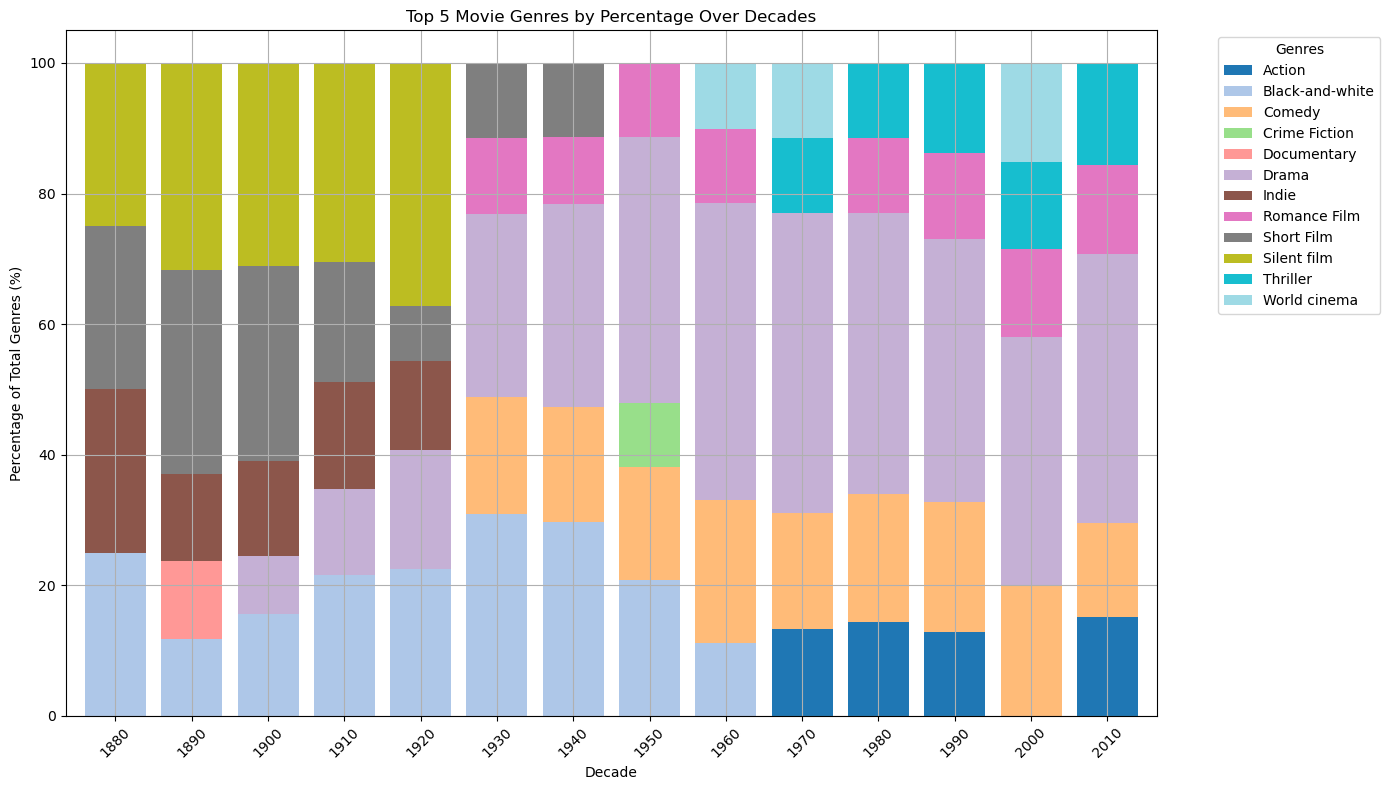

In [9]:
# Step 1: Replace NaNs in 'year' and create a 'decade' column
df = df.dropna(subset=['year'])  # Drop rows with NaN in 'year' if not needed
df['Decade'] = (df['year'] // 10 * 10).astype(int)

# Step 2: Explode the 'Movie_genres' column to have one genre per row
df_expanded = df.explode('Movie_genres')

# Step 3: Count occurrences of each genre by grouping by decade and genre
genre_counts = (
    df_expanded
    .groupby(['Decade', 'Movie_genres'])
    .size()
    .reset_index(name='Count')
)

# Step 4: Identify the top 5 genres per decade
top_genres_per_decade = (
    genre_counts
    .sort_values(['Decade', 'Count'], ascending=[True, False])
    .groupby('Decade')
    .head(5)
)

# Step 5: Pivot the data to get decades as rows, genres as columns, and counts as values
top_genres_pivot = top_genres_per_decade.pivot_table(
    index='Decade',
    columns='Movie_genres',
    values='Count',
    fill_value=0
)

# Normalize by the total number of occurrences per decade to get percentages
top_genres_normalized = top_genres_pivot.div(top_genres_pivot.sum(axis=1), axis=0) * 100

# Plot the data as a stacked bar chart
plt.figure(figsize=(14, 8))
top_genres_normalized.plot(kind='bar', stacked=True, colormap="tab20", width=0.8, ax=plt.gca())

plt.title('Top 5 Movie Genres by Percentage Over Decades')
plt.xlabel('Decade')
plt.ylabel('Percentage of Total Genres (%)')
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.show()

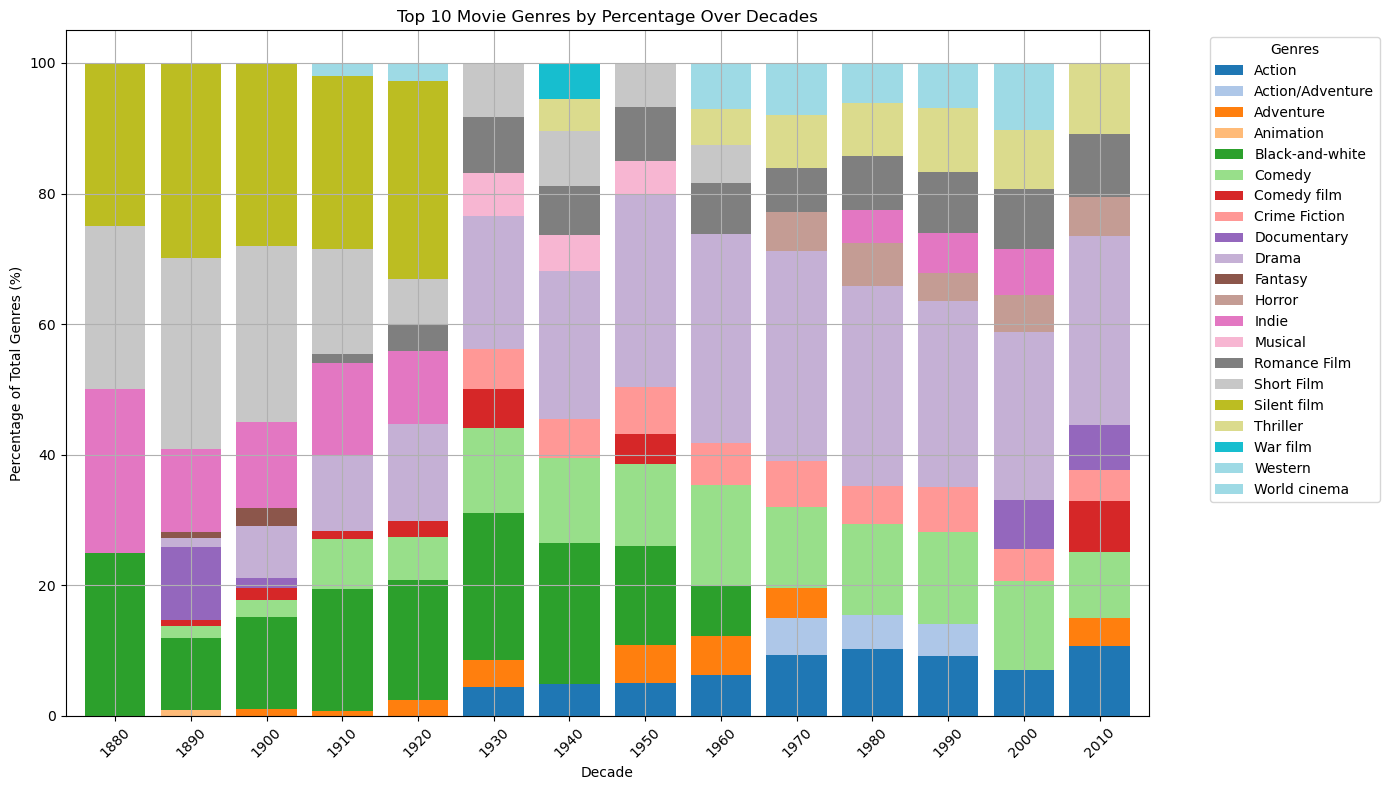

In [10]:
# Step 1: Replace NaNs in 'year' and create a 'decade' column
df = df.dropna(subset=['year'])  # Drop rows with NaN in 'year' if not needed
df['Decade'] = (df['year'] // 10 * 10).astype(int)

# Step 2: Explode the 'Movie_genres' column to have one genre per row
df_expanded = df.explode('Movie_genres')

# Step 3: Count occurrences of each genre by grouping by decade and genre
genre_counts = (
    df_expanded
    .groupby(['Decade', 'Movie_genres'])
    .size()
    .reset_index(name='Count')
)

# Step 4: Identify the top 5 genres per decade
top_genres_per_decade = (
    genre_counts
    .sort_values(['Decade', 'Count'], ascending=[True, False])
    .groupby('Decade')
    .head(10)
)

# Step 5: Pivot the data to get decades as rows, genres as columns, and counts as values
top_genres_pivot = top_genres_per_decade.pivot_table(
    index='Decade',
    columns='Movie_genres',
    values='Count',
    fill_value=0
)

# Normalize by the total number of occurrences per decade to get percentages
top_genres_normalized = top_genres_pivot.div(top_genres_pivot.sum(axis=1), axis=0) * 100

# Plot the data as a stacked bar chart
plt.figure(figsize=(14, 8))
top_genres_normalized.plot(kind='bar', stacked=True, colormap="tab20", width=0.8, ax=plt.gca())

plt.title('Top 10 Movie Genres by Percentage Over Decades')
plt.xlabel('Decade')
plt.ylabel('Percentage of Total Genres (%)')
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.show()

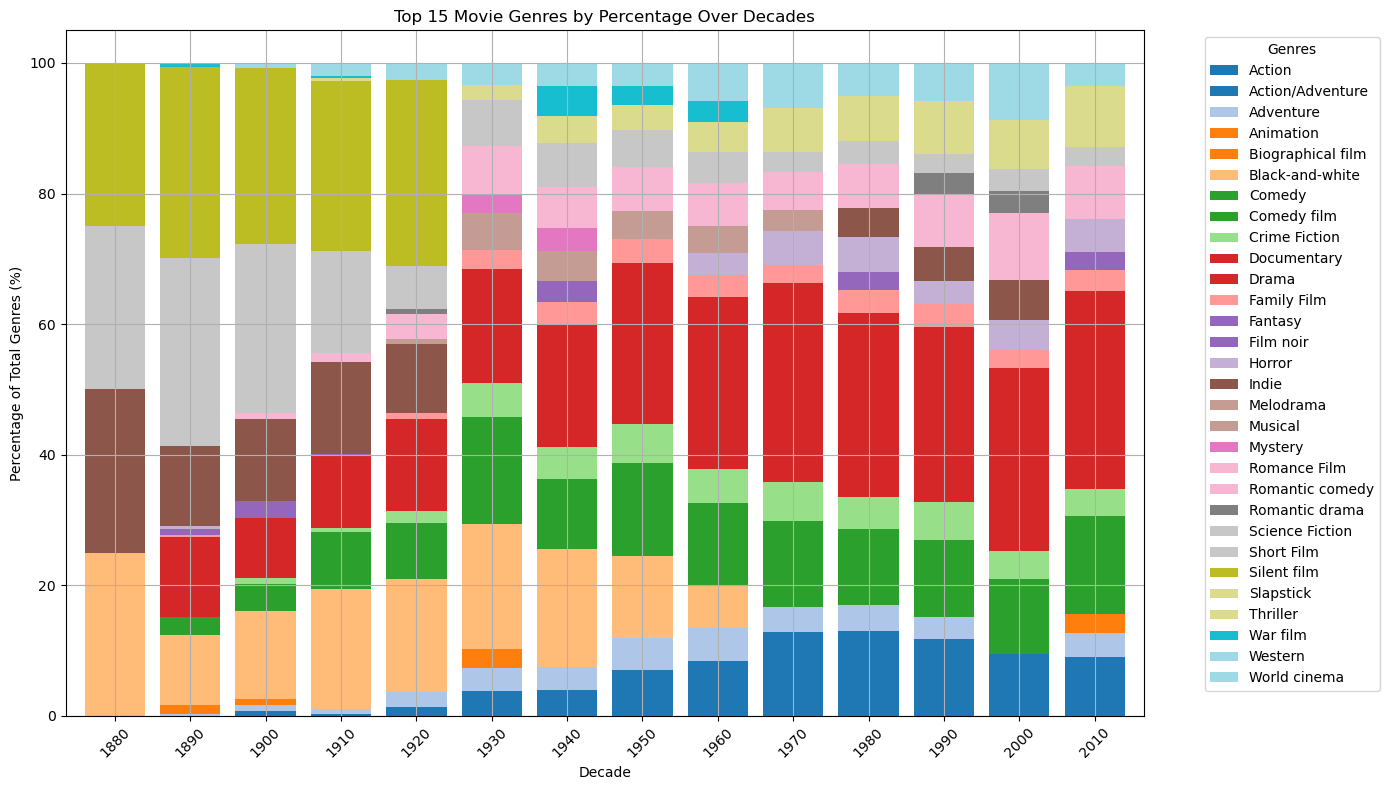

In [11]:
# Step 1: Replace NaNs in 'year' and create a 'decade' column
df = df.dropna(subset=['year'])  # Drop rows with NaN in 'year' if not needed
df['Decade'] = (df['year'] // 10 * 10).astype(int)

# Step 2: Explode the 'Movie_genres' column to have one genre per row
df_expanded = df.explode('Movie_genres')

# Step 3: Count occurrences of each genre by grouping by decade and genre
genre_counts = (
    df_expanded
    .groupby(['Decade', 'Movie_genres'])
    .size()
    .reset_index(name='Count')
)

# Step 4: Identify the top 5 genres per decade
top_genres_per_decade = (
    genre_counts
    .sort_values(['Decade', 'Count'], ascending=[True, False])
    .groupby('Decade')
    .head(15)
)

# Step 5: Pivot the data to get decades as rows, genres as columns, and counts as values
top_genres_pivot = top_genres_per_decade.pivot_table(
    index='Decade',
    columns='Movie_genres',
    values='Count',
    fill_value=0
)

# Normalize by the total number of occurrences per decade to get percentages
top_genres_normalized = top_genres_pivot.div(top_genres_pivot.sum(axis=1), axis=0) * 100

# Plot the data as a stacked bar chart
plt.figure(figsize=(14, 8))
top_genres_normalized.plot(kind='bar', stacked=True, colormap="tab20", width=0.8, ax=plt.gca())

plt.title('Top 15 Movie Genres by Percentage Over Decades')
plt.xlabel('Decade')
plt.ylabel('Percentage of Total Genres (%)')
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid()
plt.show()

In [12]:
# Explode the 'Movie_genres' column to have one genre per row
df_expanded = df.explode('Movie_genres').dropna()

# Get a list of all unique genres
genres = df_expanded['Movie_genres'].unique().tolist()

genres = sorted(genres)

# Print the list of all genres
print("List of all unique genres:")
print(genres)
print(len(genres))

List of all unique genres:
['Absurdism', 'Acid western', 'Action', 'Action Comedy', 'Action Thrillers', 'Action/Adventure', 'Addiction Drama', 'Adult', 'Adventure', 'Adventure Comedy', 'Airplanes and airports', 'Albino bias', 'Alien Film', 'Alien invasion', 'Americana', 'Animal Picture', 'Animals', 'Animated Musical', 'Animated cartoon', 'Animation', 'Anime', 'Anthology', 'Anthropology', 'Anti-war', 'Anti-war film', 'Apocalyptic and post-apocalyptic fiction', 'Archaeology', 'Archives and records', 'Art film', 'Auto racing', 'Avant-garde', 'B-Western', 'B-movie', 'Backstage Musical', 'Baseball', 'Beach Film', 'Biker Film', 'Biographical film', 'Biography', 'Biopic [feature]', 'Black comedy', 'Black-and-white', 'Blaxploitation', 'Bloopers & Candid Camera', 'Bollywood', 'Boxing', 'Breakdance', 'British Empire Film', 'British New Wave', 'Buddy cop', 'Buddy film', 'Business', 'Camp', 'Caper story', 'Cavalry Film', 'Chase Movie', 'Childhood Drama', "Children's", "Children's Fantasy", "Childr

In [13]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
# Define threshold for similarity
similarity_threshold = 80

# Dictionary to store grouped genres
grouped_genres = {}

# Step 1: Loop through each genre and group similar genres
for genre in genres:
    # Find the best match in current groups
    found_group = False
    for key in grouped_genres.keys():
        if fuzz.token_set_ratio(genre, key) >= similarity_threshold:
            grouped_genres[key].append(genre)
            found_group = True
            break
    # If no similar group is found, create a new group
    if not found_group:
        grouped_genres[genre] = [genre]

# Step 2: Convert to DataFrame for easier viewing
grouped_df = pd.DataFrame([(key, ', '.join(values)) for key, values in grouped_genres.items()], 
                          columns=['Representative Genre', 'Grouped Genres'])

# Display the grouped genres
print("Grouped Genres:")


# Display the DataFrame
grouped_df

/Users/sarah/opt/anaconda3/envs/ada/lib/python3.11/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


Grouped Genres:


,Representative Genre,Grouped Genres
0,Absurdism,Absurdism
1,Acid western,"Acid western, B-Western, Space western, Western"
2,Action,"Action, Action Comedy, Action Thrillers, Actio..."
3,Addiction Drama,"Addiction Drama, Drama"
4,Adult,Adult
...,...,...
229,Workplace Comedy,Workplace Comedy
230,World History,World History
231,World cinema,World cinema
232,Wuxia,Wuxia


In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import DBSCAN

# Step 1: Load pre-trained SBERT model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')  # Lightweight SBERT model

# Step 2: Generate embeddings for each genre
genre_embeddings = model.encode(genres)

# Step 3: Cluster embeddings using DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=1, metric='cosine')  # Adjust `eps` based on how closely you want to cluster
labels = dbscan.fit_predict(genre_embeddings)

# Step 4: Organize results into a DataFrame
clustered_genres = pd.DataFrame({'Genre': genres, 'Cluster': labels})
grouped_clusters = clustered_genres.groupby('Cluster')['Genre'].apply(list)
print("Grouped Genres by Semantic Cluster:")
print(grouped_clusters)
